In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

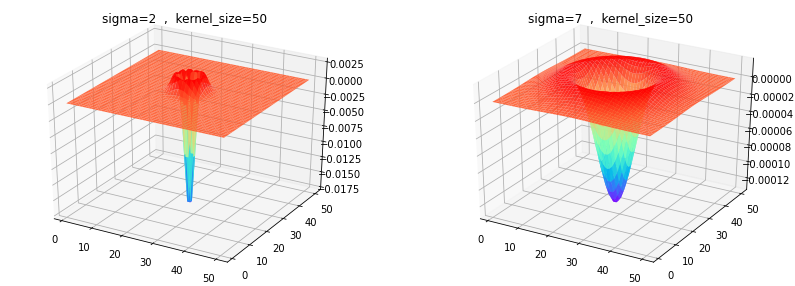

In [8]:
def LoG2D(shape, sigma):
    m, n = [(ss - 1.) / 2. for ss in shape]
    y, x = np.ogrid[-m:m + 1, -n:n + 1]
    arg = -(x ** 2 + y ** 2) / (2 * sigma ** 2)
    h = np.exp(-(x * x + y * y) / (2. * sigma * sigma))
    h[h < np.finfo(h.dtype).eps * h.max()] = 0
    h = h / h.sum() if h.sum() != 0 else h
    h1 = h * (x ** 2 + y ** 2 - 2 * sigma ** 2) / (sigma ** 4)
    return h1 - h1.mean()

size = 50
sigma1 = 2
sigma2 = 7

x = np.arange(1, size + 1)
y = np.arange(1, size + 1)
x, y = np.meshgrid(x, y)

LoG1 = LoG2D((size,size), sigma1)
LoG2 = LoG2D((size,size), sigma2)


fig, axes= plt.subplots(1, 2, figsize=(14, 5), subplot_kw={"projection": "3d"})
axes[0].plot_surface(x, y, LoG1, rstride=1, cstride=1, cmap='rainbow',alpha = 0.9)
axes[0].set_title('sigma={}  ,  kernel_size={}'.format(sigma1,size))

axes[1].plot_surface(x, y, LoG2, rstride=1, cstride=1, cmap='rainbow',alpha = 0.9)
axes[1].set_title('sigma={}  ,  kernel_size={}'.format(sigma2,size))

cv2.waitKey(0)
cv2.destroyAllWindows()
